In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import iop_ext as iop #artem stuff
import matplotlib.ticker as mticker
import os
import matplotlib.font_manager as fm

***DEFINE CONSTANTS - EXOPLANET OF INTEREST: TOI-178b***

In [2]:
Lsun = 3.846e26 #Luminosity of the Sun in W
Msun = 1.9891e30 #Mass of the Sun in KG
Mearth = 5.97219e24 #Mass of Earth in KG
Rearth = 6.371e6 #Radius of Earth in m
au = 1.49598e11 #AU in m
yr = 3600*24*365 #Year to Seconds converter
a0 = 0.5 #Slope of LHE (high energy luminosity)
tsat = 1.0e8*yr #Duration of saturation phase
G = 6.67e-11 #Universal gravitational constant
pi = np.pi #pi

#PLANET: Go to NEA and input an exoplanets data in the following:
Lstar = Lsun*10**-0.879
Mstar = Msun*0.65
Teq = 1040
a = au*0.02607
x0 = 0.5 #Initial WMF
CMFprime = 0.325 #Reduced CMF
Lsat = (10**(-3.5))*Lsun*(Mstar/Msun) #LHE During the saturation phase

***INITIALIZE VARIABLES***

In [3]:
t = 1e6 * yr #1 million years to seconds
M0 = 1.5 * Mearth #Initial mass of Planet
Mp = M0 #initialize the mass
x = x0

***DEFINE FUNCTIONS***

In [4]:
def RpFunction(CMF, x, Teq, Mp): #Function to find radius of planet in m (CMF, WMF, Teq, Mp)
    radius = iop.radius_iop(CMF, x, Teq, Mp/Mearth) #thank you artem for the heavy lifting :D
    return radius*Rearth

def nFunction(Mp, Rp): #N is the efficiency parameter (Greek letter) how much energy is converted to mass loss
    vesc = ((2*G*Mp)/(Rp))**(1/2) #Escape velocity of the planet
    n = 0.1*((vesc/15000)**-2)
    return n

def LheFunction(t): #LHE
    if (t<tsat):
        return Lsat
    else:
        Lhe = Lsat*((t/tsat)**(-1-a0))
        return Lhe

def mFunction(Mp, Rp, t): #Time derivative of Mp in kg/s lost
    Lhe = LheFunction(t)
    n = nFunction(Mp, Rp)
    m_loss = (n*(((pi)*(Rp**3)*(Lhe))/(4*(pi)*(a**2)*(G)*(Mp))))
    return m_loss #[(m*1e9*yr)/Mearth] to return mass in Earthmass per billion years


def xwmfFunction(Mp): #xwmf = WMF
    x = (M0*x0-M0+Mp)/Mp
    return x 


***EVOLUTION***

<>:73: SyntaxWarning: invalid escape sequence '\o'
<>:74: SyntaxWarning: invalid escape sequence '\o'
<>:77: SyntaxWarning: invalid escape sequence '\o'
<>:109: SyntaxWarning: invalid escape sequence '\o'
<>:73: SyntaxWarning: invalid escape sequence '\o'
<>:74: SyntaxWarning: invalid escape sequence '\o'
<>:77: SyntaxWarning: invalid escape sequence '\o'
<>:109: SyntaxWarning: invalid escape sequence '\o'
/var/folders/y7/_y90kbkn675gdcfxq782p13w0000gn/T/ipykernel_9600/3563174658.py:73: SyntaxWarning: invalid escape sequence '\o'
  ax1.plot(timeArray/(1e6*yr), massArray/Mearth,   'g--',  lw=2, label="Mass ($M_\oplus$)")
/var/folders/y7/_y90kbkn675gdcfxq782p13w0000gn/T/ipykernel_9600/3563174658.py:74: SyntaxWarning: invalid escape sequence '\o'
  ax1.plot(timeArray/(1e6*yr), radiusArray/Rearth, 'r-', lw=2, label="Radius ($R_\oplus$)")
/var/folders/y7/_y90kbkn675gdcfxq782p13w0000gn/T/ipykernel_9600/3563174658.py:77: SyntaxWarning: invalid escape sequence '\o'
  ax1.set_ylabel("Mass & Rad

Starting time 1000000.00 years, Mass 1.500000 M_earth, Radius 2.545298 R_earth, WMF: 0.500000, Mass Loss Rate: 2.831165e+09 kg/s
***NEGATIVE WATER MASS FRACTION***
Ending time 62000000.00 years, Mass 0.7493361 M_earth, Radius 0.91 R_earth, WMF: -0.0008859, Mass Loss Rate: 1.831363e+08 kg/s
Evolution loop complete.


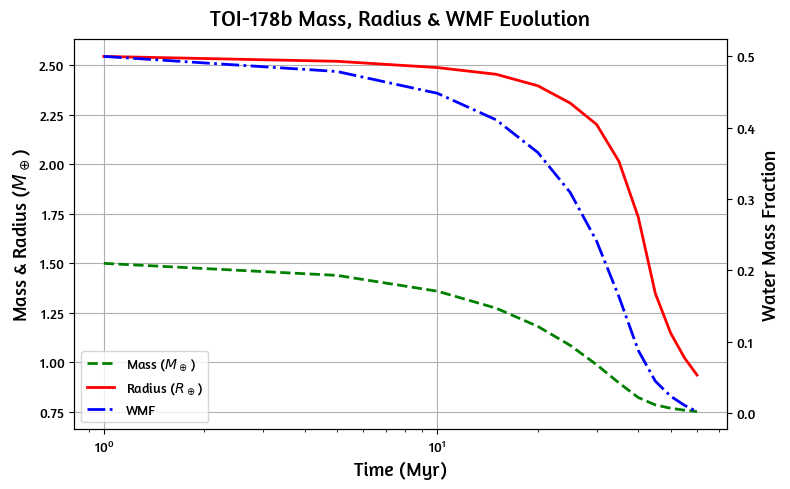

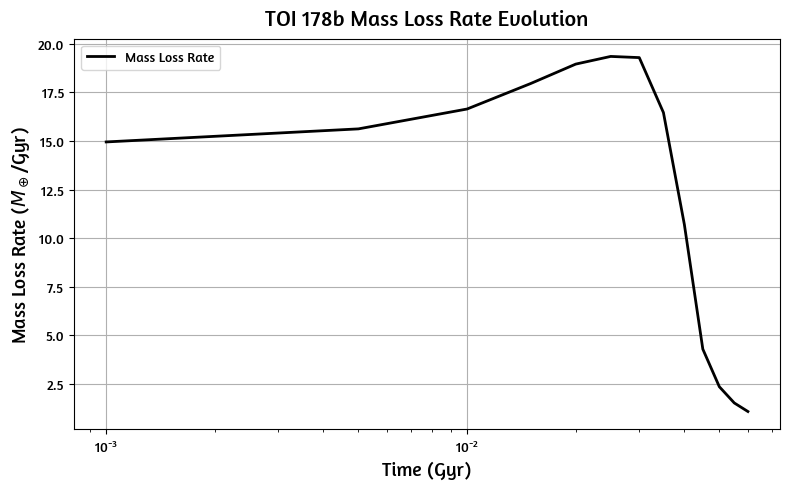

In [6]:
# Start with 1 million years
t_start = 1e6*yr
time_step_save = 5*1e6*yr #every million years - 1,000 values total
t = 1e6 * yr
deltat = 1e6 * yr  # Increment by 1 million years
t_max = 5e9 * yr #max time
Mp = M0
Rp = RpFunction(CMFprime, x0, Teq, M0)
R0=Rp
m_loss = mFunction(Mp, Rp, t)

print(f"Starting time {t/yr:.2f} years, Mass {M0/Mearth:.6f} M_earth, Radius {R0/Rearth:.6f} R_earth, WMF: {x0:.6f}, Mass Loss Rate: {m_loss:.6e} kg/s")

errorCode = iop.error_iop(CMFprime, x0, Teq, M0/Mearth)
                          
iteration = 0  

timeArray = np.zeros(0) #empty array
massArray = np.zeros(0)
radiusArray = np.zeros(0)
xArray = np.zeros(0)
massLossArray = np.zeros(0)

timeArray = np.append(timeArray, t_start) #append initial values
massArray = np.append(massArray, M0)
radiusArray = np.append(radiusArray, R0)
xArray = np.append(xArray, x0)
massLossArray = np.append(massLossArray, m_loss)

while (t < t_max):  # Run until 5 billion years 
    iteration += 1
    Mp -= m_loss*deltat  # Now update Mp using the newly computed m
    x = xwmfFunction(Mp)  # Update WMF
    Rp = RpFunction(CMFprime, x, Teq, Mp)  # Update radius
    t += deltat
    m_loss_new = mFunction(Mp, Rp, t)
    m_loss = m_loss_new

    if ((t%time_step_save) == 0): #every five million years (1000 times)
        timeArray = np.append(timeArray, t)
        massArray = np.append(massArray, Mp)
        radiusArray = np.append(radiusArray, Rp)
        xArray = np.append(xArray, x)
        massLossArray = np.append(massLossArray, m_loss)

    if t>t_max:
        print("greater time")
        break
    elif Rp<0:
        print("negative radius")
        break
    elif (errorCode == 2):
        print ("Stopping because error code is 2")
        break
    elif x<0:
        print('***NEGATIVE WATER MASS FRACTION***')
        break

print(f"Ending time {t/yr:.2f} years, Mass {Mp/Mearth:.7f} M_earth, Radius {Rp/Rearth:.2f} R_earth, WMF: {x:.7f}, Mass Loss Rate: {m_loss:.6e} kg/s")
print("Evolution loop complete.")  

font_path = os.path.join("amaranth", "Amaranth-Regular.ttf")
fm.fontManager.addfont(font_path)
amaranth = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = amaranth


plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor']   = 'white'
fig1, ax1 = plt.subplots(figsize=(8, 5))

# plot Mass and Radius on the primary y‑axis
ax1.plot(timeArray/(1e6*yr), massArray/Mearth,   'g--',  lw=2, label="Mass ($M_\oplus$)")
ax1.plot(timeArray/(1e6*yr), radiusArray/Rearth, 'r-', lw=2, label="Radius ($R_\oplus$)")
ax1.set_xscale("log")
ax1.set_xlabel("Time (Myr)", fontsize=14)
ax1.set_ylabel("Mass & Radius ($M_\oplus$)", fontsize=14)
ax1.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.ticklabel_format(axis='y', useOffset=False)


# create a twin axis for WMF
ax1b = ax1.twinx()
ax1b.plot(timeArray/(1e6*yr), xArray, 'b-.', lw=2, label="WMF")
ax1b.set_ylabel("Water Mass Fraction", fontsize=14)
ax1b.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax1b.ticklabel_format(axis='y', useOffset=False)

# combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax1b.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="lower left")

ax1.set_title("TOI-178b Mass, Radius & WMF Evolution", fontsize=16, pad=10)
ax1.grid(True)

fig1.tight_layout()


# --- Mass Loss Rate Evolution ---
fig2, ax2 = plt.subplots(figsize=(8, 5))

ax2.plot(timeArray/(1e9*yr),
         massLossArray*1e9*yr/Mearth,
         'k-', linewidth=2,
         label="Mass Loss Rate")
ax2.set_xscale("log")
ax2.set_xlabel("Time (Gyr)", fontsize=14)
ax2.set_ylabel("Mass Loss Rate ($M_\oplus$/Gyr)", fontsize=14)
ax2.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax2.ticklabel_format(axis='y', useOffset=False)
ax2.set_title("TOI 178b Mass Loss Rate Evolution", fontsize=16, pad=10)
ax2.grid(True)
ax2.legend()

fig2.tight_layout()

plt.show()

In [12]:
print(len(radiusArray))

13
